In [46]:
import numpy as np
import pandas as pd

In [47]:
df = pd.read_csv("breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [48]:
df.drop(columns=['id'],inplace=True)

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=0.2,random_state=2)

In [50]:
# It is recommended to scale features to the same range
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [52]:
knn.fit(X_train,y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [53]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)

accuracy_score(y_test,y_pred)
#0.9736842105263158
#0.9736842105263158

0.9736842105263158

### Experementing with n values

In [54]:
accuracies = []
for i in range(1,13):
    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(X_train,y_train)

    y_pred = knn.predict(X_test)

    accuracies.append(accuracy_score(y_test,y_pred))

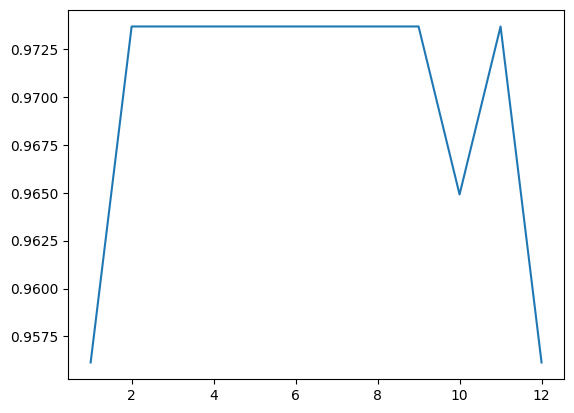

In [55]:
import matplotlib.pyplot as plt

plt.plot(range(1,13),accuracies)

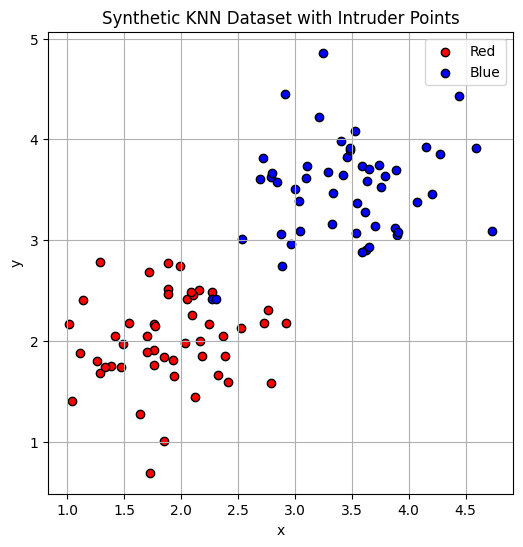

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Generate Red cluster (centered at (2, 2))
red_x = np.random.normal(2, 0.5, 50)
red_y = np.random.normal(2, 0.5, 50)

# Generate Blue cluster (centered at (3.5, 3.5))
blue_x = np.random.normal(3.5, 0.5, 50)
blue_y = np.random.normal(3.5, 0.5, 50)

# Add a couple of Blue points within the Red region
intruder_x = np.random.normal(2.2, 0.2, 2)
intruder_y = np.random.normal(2.2, 0.2, 2)

# Combine data
X = np.concatenate([red_x, blue_x, intruder_x])
Y = np.concatenate([red_y, blue_y, intruder_y])
labels = ['Red'] * 50 + ['Blue'] * 50 + ['Blue'] * 2

# Create DataFrame
df = pd.DataFrame({'x': X, 'y': Y, 'label': labels})

# Plotting
colors = {'Red': 'red', 'Blue': 'blue'}
plt.figure(figsize=(6,6))
for label in df['label'].unique():
    subset = df[df['label'] == label]
    plt.scatter(subset['x'], subset['y'], c=colors[label], label=label, edgecolor='k')
plt.legend()
plt.title("Synthetic KNN Dataset with Intruder Points")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

 as the model may fit to noise or outlier points (such as "intruder" points from another class), resulting in poor generalization to new data.(overfitting)

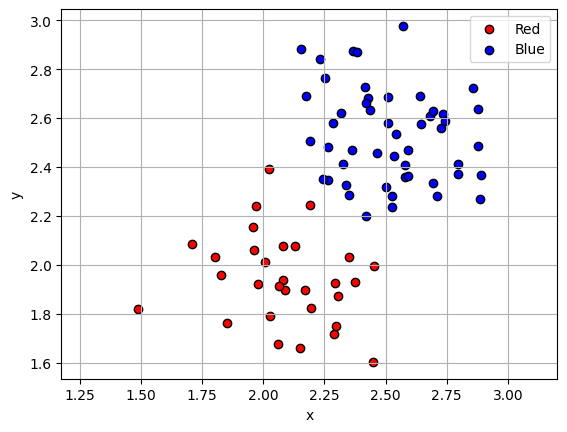

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(0)

# Red cluster
red_x = np.random.normal(2, 0.2, 30)
red_y = np.random.normal(2, 0.2, 30)

# Blue cluster
blue_x = np.random.normal(2.5, 0.2, 50)
blue_y = np.random.normal(2.5, 0.2, 50)


# Plot Red points
plt.scatter(red_x, red_y, color='red', label='Red', edgecolor='k')

# Plot Blue points
plt.scatter(blue_x, blue_y, color='blue', label='Blue', edgecolor='k')


# Labels and styling
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

Taking very high value of k will lead to overfitting as the output will become the dominating class

In [17]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd

# Sample input arrays (make sure these are defined)
# red_x, blue_x = ...
# red_y, blue_y = ...

X = np.concatenate([red_x, blue_x])
y = np.concatenate([red_y, blue_y])
labels = ['Red'] * 30 + ['Blue'] * 50

df = pd.DataFrame({'x': X, 'y': y, 'label': labels})

# Prepare features and labels
X_knn = df[['x', 'y']].values
y_knn = df['label'].values

# Fit KNN with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_knn, y_knn)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [18]:
knn.predict([[2, 2]])

array(['Red'], dtype=object)